# **ML Project**

This file covers all fundamental concepts required for our project

**Authors**
  * Andrew Guillete
  * Lucas Thormann

# **Overview**

* See [README.md](README.md) for project description & details

# **Exploratory Data Analysis**
* Creating a dataframe & exploring the data

In [320]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale 
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# **Exploratory Data Analysis**

In [321]:
df = pd.read_csv('quantumstock1.csv', na_values = "?")

In [322]:
df.head(10)

,Date,open,high,low,close,adjclose,volume,ticker
0,2021-01-04,11.125,11.25,10.500,10.80,10.80,150500.0,IONQ
1,2021-01-05,10.850,11.83,10.750,11.11,11.11,165300.0,IONQ
2,2021-01-06,11.500,11.50,11.000,11.05,11.05,175600.0,IONQ
3,2021-01-07,11.500,11.50,11.050,11.11,11.11,94200.0,IONQ
4,2021-01-08,11.650,12.35,11.000,11.01,11.01,137500.0,IONQ
5,2021-01-11,11.800,11.80,10.800,11.17,11.17,162600.0,IONQ
6,2021-01-12,11.800,11.80,11.070,11.18,11.18,210700.0,IONQ
7,2021-01-13,11.340,11.37,10.970,11.20,11.20,386100.0,IONQ
8,2021-01-14,11.310,11.70,11.225,11.44,11.44,291000.0,IONQ
9,2021-01-15,11.570,11.79,11.110,11.22,11.22,269600.0,IONQ


In [323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136518 entries, 0 to 136517
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Date      136518 non-null  object 
 1   open      136473 non-null  float64
 2   high      136473 non-null  float64
 3   low       136473 non-null  float64
 4   close     136473 non-null  float64
 5   adjclose  136473 non-null  float64
 6   volume    136473 non-null  float64
 7   ticker    136518 non-null  object 
dtypes: float64(6), object(2)
memory usage: 8.3+ MB


In [324]:
df.describe()

,open,high,low,close,adjclose,volume
count,136473.000000,136473.000000,136473.000000,136473.000000,136473.000000,1.364730e+05
mean,167.119533,168.892349,165.238686,167.098051,145.714925,1.256765e+07
std,499.878954,504.748352,494.531675,499.680962,451.972433,2.434017e+07
min,0.000000,0.015000,0.010000,0.015000,0.015000,0.000000e+00
25%,8.289412,8.390625,8.160000,8.282209,4.747473,8.074000e+05
50%,24.780001,25.059999,24.500000,24.796844,16.538219,3.271000e+06
75%,69.760002,70.559998,68.970001,69.773445,53.453701,1.122740e+07
max,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,1.123003e+09


**Cleaning Data**
* Begin data cleaning for all columns by filling NaN's with value 0

In [325]:
print(df.isna().sum())

df.fillna(value=0,inplace=True)

Date         0
open        45
high        45
low         45
close       45
adjclose    45
volume      45
ticker       0
dtype: int64


In [326]:
df.isna().sum()

Date        0
open        0
high        0
low         0
close       0
adjclose    0
volume      0
ticker      0
dtype: int64

# **Data Preprocessing & Further Exploration** 
* Breaking the dataset into three subsets (arbitrarily) based on their ticker then ```visualizing``` the data


In [327]:
df1 = df[df['ticker'] == 'IONQ']
df2 = df[df['ticker'] == 'GOOG']
df3 = df[df['ticker'] == 'IBM']

<AxesSubplot:xlabel='Date', ylabel='adjclose'>

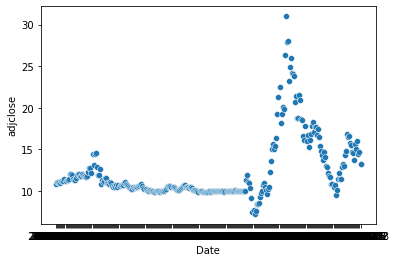

In [328]:
sns.scatterplot(data = df1 , x ='Date', y = 'adjclose')

<AxesSubplot:xlabel='Date', ylabel='adjclose'>

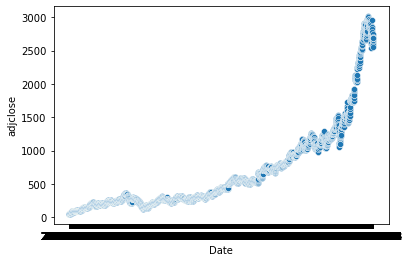

In [329]:
sns.scatterplot(data = df2 , x ='Date', y = 'adjclose')

<AxesSubplot:xlabel='Date', ylabel='adjclose'>

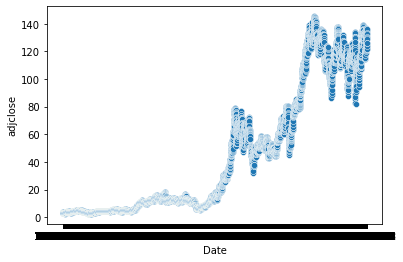

In [330]:
sns.scatterplot(data = df3, x ='Date', y = 'adjclose')

**Data Cleaning**

In [331]:
df2.drop(['ticker'], axis = 1, inplace = True)
df2['Date'] = pd.to_datetime(df2['Date'])
df2['Date'].dt.strftime('%Y%m%d')

C:\Users\Scott\AppData\Local\Temp\ipykernel_11552\3910634810.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(['ticker'], axis = 1, inplace = True)
C:\Users\Scott\AppData\Local\Temp\ipykernel_11552\3910634810.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Date'] = pd.to_datetime(df2['Date'])


28607    20040819
28608    20040820
28609    20040823
28610    20040824
28611    20040825
           ...   
33019    20220228
33020    20220301
33021    20220302
33022    20220303
33023    20220303
Name: Date, Length: 4417, dtype: object

In [332]:
df2['Date'] = pd.to_numeric(df2['Date'],errors = 'coerce')
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4417 entries, 28607 to 33023
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      4417 non-null   int64  
 1   open      4417 non-null   float64
 2   high      4417 non-null   float64
 3   low       4417 non-null   float64
 4   close     4417 non-null   float64
 5   adjclose  4417 non-null   float64
 6   volume    4417 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 276.1 KB


C:\Users\Scott\AppData\Local\Temp\ipykernel_11552\37071692.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Date'] = pd.to_numeric(df2['Date'],errors = 'coerce')


**Data Normalization**
* In its raw form from Kaggle the data is not in a good range to predict the future price. Feature scaling is the way to normalize the data to increase the performance of some machine learning algorithms. Here we use sklearn MinMaxScaler method to range the data between 0 and 1.

In [333]:
scaler = MinMaxScaler()
feature_columns = df2.columns
feature_minmax_data = scaler.fit_transform(df2)
normalized_features_df = pd.DataFrame(columns=feature_columns, data=feature_minmax_data, index=df2.index)

In [334]:
y = normalized_features_df.adjclose.values
normalized_features_df.drop(['adjclose'],axis=1,inplace=True)
x= normalized_features_df.values
xtrain, xtest, ytrain, ytest =  train_test_split(x,y, test_size = 0.25, random_state=42)

Text(0, 0.5, 'Price')

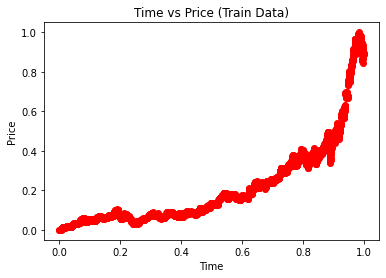

In [335]:
plt.scatter(xtrain[:,0], ytrain , color="red")
plt.title('Time vs Price (Train Data)')
plt.xlabel("Time")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

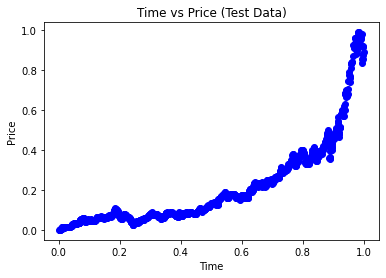

In [336]:
plt.scatter(xtest[:,0], ytest , color="blue")
plt.title('Time vs Price (Test Data)')
plt.xlabel("Time")
plt.ylabel("Price")

# **Machine Learning Approaches - Model Training & Testing - Experimentation**

1. Ridge regression is a model tuning method that is used to analyze any data that suffers from multicollinearity. This method performs L2 regularization. If there is an issue with multicollinearity, least-squares are unbiased, and variances are large, this results in predicted values are far away from the actual data. In our model, the results show that the predicted data fits well based on the MSE and R2 Score.

2. Lasso regression is a regularization technique. It obtains the subset of predictors that minimizes prediction error. This model uses shrinkage. Shrinkage is where data values are shrunk towards a central point as the mean. The lasso procedure encourages simple, sparse models.

In [337]:
alphas = 10**np.linspace(10,-2,100)*0.5
ridge = Ridge()
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(xtrain, ytrain)
    coefs.append(ridge.coef_)
    
np.shape(coefs) 

pred1 = ridge.predict(xtest)          
print(pd.Series(ridge.coef_, index = normalized_features_df.columns[0:6]))

Date      0.000135
open     -0.069195
high      0.139389
low       0.155779
close     0.774057
volume    0.000156
dtype: float64


In [338]:
ridge2 = Ridge(alpha=4)
ridge2.fit(xtrain,ytrain)            
pred2 = ridge2.predict(xtest)      
print(pd.Series(ridge2.coef_, index = normalized_features_df.columns[0:6])) 

Date      0.017145
open      0.240508
high      0.244910
low       0.244658
close     0.249042
volume    0.009612
dtype: float64


In [339]:
ridge3 = Ridge(alpha=10**10)
ridge3.fit(xtrain,ytrain)             
pred3 = ridge3.predict(xtest) 
    
print(pd.Series(ridge3.coef_, index = normalized_features_df.columns[0:6]))  

Date      1.727859e-08
open      1.506811e-08
high      1.519337e-08
low       1.512606e-08
close     1.519729e-08
volume   -3.022569e-09
dtype: float64


In [340]:
ridge4 = Ridge(alpha=0)
ridge4.fit(xtrain,ytrain)             
pred4 = ridge4.predict(xtest)   
    
print(pd.Series(ridge4.coef_, index = normalized_features_df.columns[0:6]))  

Date     -2.110412e-14
open      1.427032e-11
high     -1.421068e-11
low      -2.200753e-11
close     1.000000e+00
volume   -5.183243e-14
dtype: float64


In [341]:
lasso = Lasso(max_iter = 10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(xtrain, ytrain)
    coefs.append(lasso.coef_)

np.shape(coefs) 

pred1_lasso = lasso.predict(xtest)
print(pd.Series(lasso.coef_, index = normalized_features_df.columns[0:6]))

Date      0.029284
open      0.000000
high      0.217286
low       0.000000
close     0.640509
volume   -0.000000
dtype: float64


In [342]:
lasso2 = Lasso(alpha = 4.0)
coefs2 = []

for a in alphas:
    lasso2.set_params(alpha=a)
    lasso2.fit(xtrain, ytrain)
    coefs2.append(lasso.coef_)

np.shape(coefs2) 
pred2_lasso = lasso2.predict(xtest)
print(pd.Series(lasso2.coef_, index = normalized_features_df.columns[0:6]))

Date      0.029416
open      0.000000
high      0.689339
low       0.000000
close     0.168428
volume   -0.000000
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.583e-02, tolerance: 1.520e-02
  model = cd_fast.enet_coordinate_descent(


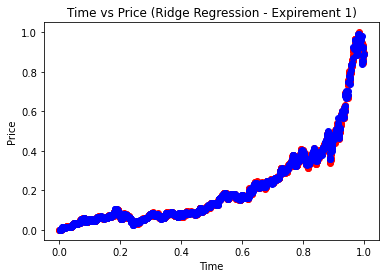

In [343]:
plt.scatter(xtrain[:,0], ytrain, color = 'red')
plt.scatter(xtest[:,0], pred1, color = 'blue')
plt.title('Time vs Price (Ridge Regression - Expirement 1)')
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()

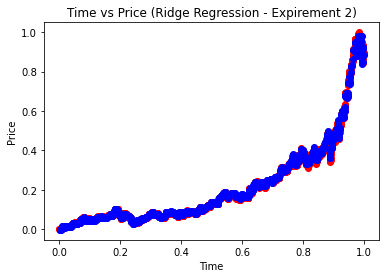

In [344]:
plt.scatter(xtrain[:,0], ytrain, color = 'red')
plt.scatter(xtest[:,0], pred2, color = 'blue')
plt.title('Time vs Price (Ridge Regression - Expirement 2)')
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()

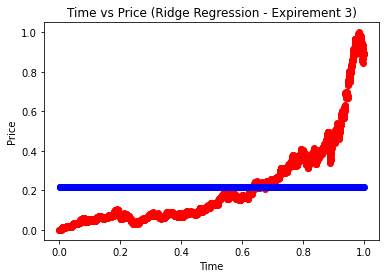

In [345]:
plt.scatter(xtrain[:,0], ytrain, color = 'red')
plt.scatter(xtest[:,0], pred3, color = 'blue')
plt.title('Time vs Price (Ridge Regression - Expirement 3)')
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()

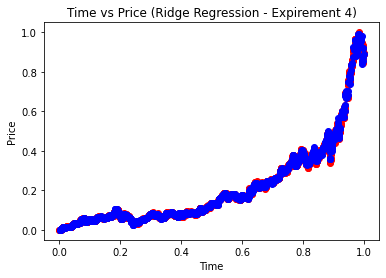

In [346]:
plt.scatter(xtrain[:,0], ytrain, color = 'red')
plt.scatter(xtest[:,0], pred4, color = 'blue')
plt.title('Time vs Price (Ridge Regression - Expirement 4)')
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()

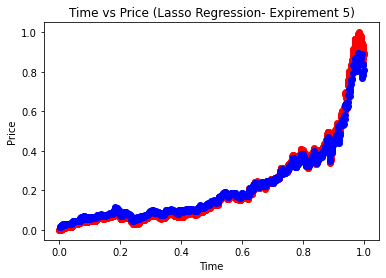

In [347]:
plt.scatter(xtrain[:,0], ytrain, color = 'red')
plt.scatter(xtest[:,0], pred1_lasso, color = 'blue')
plt.title('Time vs Price (Lasso Regression- Expirement 5)')
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()

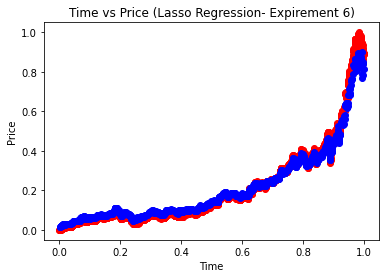

In [348]:
plt.scatter(xtrain[:,0], ytrain, color = 'red')
plt.scatter(xtest[:,0], pred2_lasso, color = 'blue')
plt.title('Time vs Price (Lasso Regression- Expirement 6)')
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()

**Evaluation Metrics**
* The r2 score varies between 0 and 100%. R2 Score can be defined as the proportion of the variance in the dependent variable that is predictable from the independent variable(s).
Another definition is “(total variance explained by model) / total variance.” So if it is 100%, the two variables are perfectly correlated, i.e., with no variance at all. A low value would show a low level of correlation, meaning a regression model that is not valid, but not in all cases.


* Mean square error (MSE) is the average of the square of the errors. The larger the number the larger the error. Error in this case means the difference between the observed values y1, y2, y3, … and the predicted ones pred(y1), pred(y2), pred(y3), … We square each difference (pred(yn) – yn)) ** 2 so that negative and positive values do not cancel each other out.

In [349]:
print("Ridge Regression: \n")
print("Expirement 1:")
mse1 = mean_squared_error(ytest, pred1)       
print("Test mean squared error (MSE): ", mse1)
print("R2 Score:", r2_score(ytest, pred1))
print("\nExpirement 2: ")
mse2 = mean_squared_error(ytest, pred2)       
print("Test mean squared error (MSE): ", mse2)
print("R2 Score:", r2_score(ytest, pred2))
print("\nExpirement 3: ")
mse3 = mean_squared_error(ytest, pred3)         
print("Test mean squared error (MSE): ", mse3)
print("R2 Score:", r2_score(ytest, pred3))
print("\nExpirement 4: ")
mse4 = mean_squared_error(ytest, pred4)         
print("Test mean squared error (MSE): ", mse4)
print("R2 Score:", r2_score(ytest, pred4))

print("\nLasso Regression: \n")
print("Expirement 5:")
mse5 = mean_squared_error(ytest, pred1_lasso)       
print("Test mean squared error (MSE): ", mse5)
print("R2 Score:", r2_score(ytest, pred1_lasso))
print("\nExpirement 6:")
mse6 = mean_squared_error(ytest, pred2_lasso)         
print("Test mean squared error (MSE): ", mse6)
print("R2 Score:", r2_score(ytest, pred2_lasso))

Ridge Regression: 

Expirement 1:
Test mean squared error (MSE):  2.198317444450887e-07
R2 Score: 0.9999955226981038

Expirement 2: 
Test mean squared error (MSE):  1.1895637704175748e-05
R2 Score: 0.9997577221552572

Expirement 3: 
Test mean squared error (MSE):  0.04912435648526495
R2 Score: -0.000513256170368237

Expirement 4: 
Test mean squared error (MSE):  2.059797291843774e-27
R2 Score: 1.0

Lasso Regression: 

Expirement 5:
Test mean squared error (MSE):  0.000606140280626577
R2 Score: 0.987654771904287

Expirement 6:
Test mean squared error (MSE):  0.0006014653719301561
R2 Score: 0.9877499855306182


# **Conclusion**
* In this project, we have trained a couple of machine learning algorithms to predict stock prices. After comparing the metrics of the models' we found actual trend line and predicted trend line indicate that the Ridge regression model is the best fit model that we can use to predict the stock price. 
* After tuning the Ridge regression model with various alpha/lambda values, the model is enhanced. Through our work we can deduce that it is most likely impossible to develop a model whose prediction capacity is 99% accurate since there are multiple variables that affect the price of a company's stock. Nevertheless, we could at the very least predict the general trendline of a stocks share price by taking different factors into consideration.
